Use the Machine Learning algorithms: Decision Tree, and Random Forest, with parameters optimization, to evaluate the performance of the classification to the database BDParkinson_Prediction.csv. Discuss the results obtained. 
Due date: 04/05/2020 
 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set(style='whitegrid',
        rc={'lines.linewidth': 2.5,
        'figure.figsize': (10, 8),
        'text.usetex': False,
        # 'font.family': 'sans-serif',
        # 'font.sans-serif': 'Optima LT Std',
        })

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import truncnorm

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

filename = 'BDParkinson_Prediction.csv'
training_data = pd.read_csv(filename)

# CLASS is the label/prediction 
patterns_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
correct_Pattern_labels = training_data['CLASS'].values 
feature_vectors = training_data.drop(['CLASS'], axis=1)

training_data.describe()

# Set random seed to ensure reproducible runs
RSEED = 200

In [2]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

from sklearn. model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, 
                                                    correct_Pattern_labels, test_size=0.2,
                                                    random_state=42)

#default parameters for DT classification
clf = tree.DecisionTreeClassifier()

clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Predicted accuracy: %.3f%%' % (100*accuracy(conf_te),))

predicted_labels = clf.predict(X_test)

conf = confusion_matrix(y_test, predicted_labels)
# then print it in a pretty way
#print_cm(conf, patterns_labels)

print('Classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confusion matrix:\n',confusion_matrix(y_test, predicted_labels))

Predicted accuracy: 99.000%
Classification accuracy = 0.990000
Accuracy: 0.99
F1 score: 0.9899755842343915
Recall: 0.99
Precision: 0.9903225806451613

 clasification report:
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        31
     Class_2       1.00      1.00      1.00        15
     Class_3       1.00      0.96      0.98        24
     Class_4       0.97      1.00      0.98        30

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


 confusion matrix:
 [[31  0  0  0]
 [ 0 15  0  0]
 [ 0  0 23  1]
 [ 0  0  0 30]]


In [3]:
from sklearn.tree import DecisionTreeClassifier
print(f'Decision tree has {clf.tree_.node_count} nodes with maximum depth {clf.tree_.max_depth}.')

print(f'Model Accuracy: {clf.score(X_train, y_train)}')

Decision tree has 15 nodes with maximum depth 5.
Model Accuracy: 1.0


The following approach evaluates the model for a range of parameters values using Grid Search. Grid search approach searches for the best of parameters values for optimization.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

dt = DecisionTreeClassifier(random_state=RSEED)

params_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] }

grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring = 'accuracy')

grid_dt.fit(X_train, y_train)

best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

#This is the parameter optimization
# Make a decision tree and train
#out shows several parameters we can optimize for performance 

Best hyerparameters:
 {'criterion': 'gini', 'max_depth': 7}


Limit max depth so that the tree can generalize better to testing data, this will reduce accuracy for the training data.

In [5]:
# Limit maximum depth and train
# Gini is default parameter, no need to specify
short_tree = DecisionTreeClassifier(max_depth = 7, random_state=RSEED)
short_tree.fit(X_train, y_train)

print(f'Model Accuracy: {short_tree.score(X_train, y_train)}')

Model Accuracy: 1.0


In [6]:
conf_te = confusion_matrix(y_test, short_tree.predict(X_test))

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Predicted accuracy: %.3f%%' % (100*accuracy(conf_te),))


predicted_labels = short_tree.predict(X_test)

conf = confusion_matrix(y_test, predicted_labels)

print('Classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confusion matrix:\n',confusion_matrix(y_test, predicted_labels))

Predicted accuracy: 100.000%
Classification accuracy = 1.000000
Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        31
     Class_2       1.00      1.00      1.00        15
     Class_3       1.00      1.00      1.00        24
     Class_4       1.00      1.00      1.00        30

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


 confusion matrix:
 [[31  0  0  0]
 [ 0 15  0  0]
 [ 0  0 24  0]
 [ 0  0  0 30]]


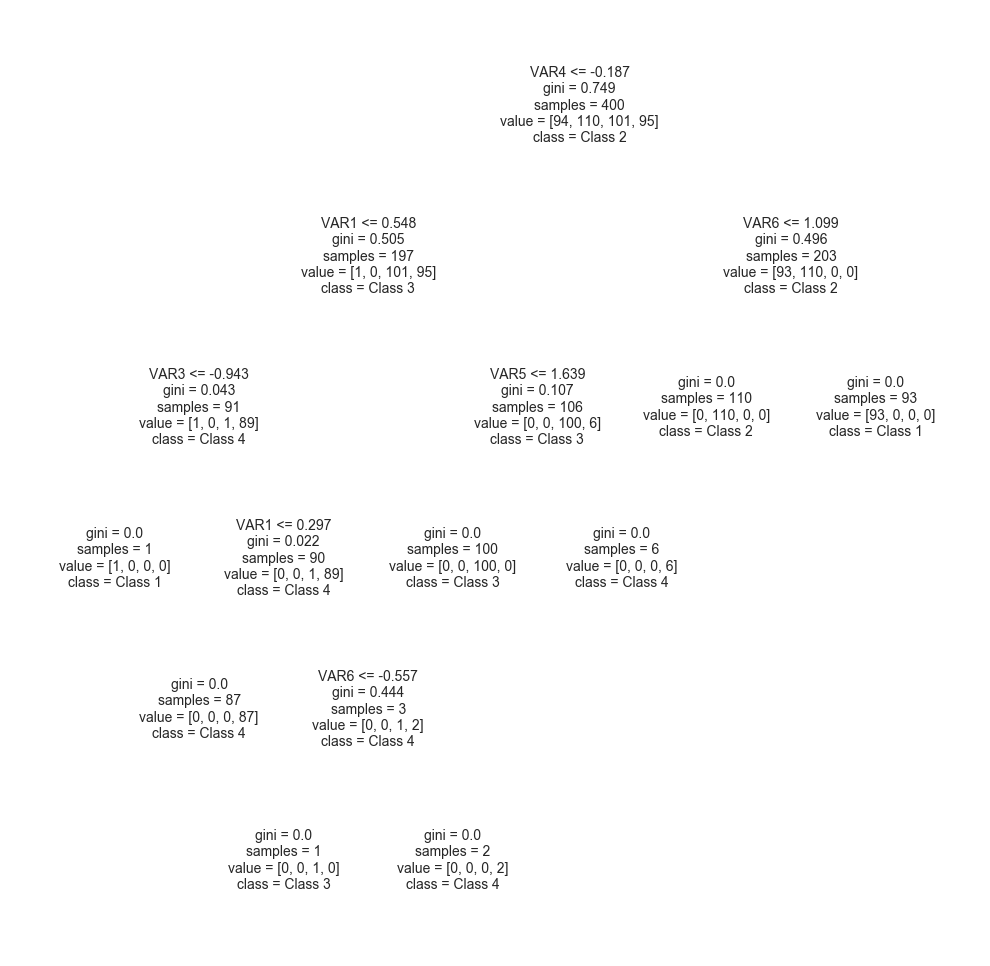

In [16]:
fn = ['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6']
cn = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(short_tree, 
              feature_names = fn,
              class_names = cn);

fig.savefig('DT_optimize.png')

In [21]:
# DISPLAY USING GRAPHVIZ INSTEAD FOR AESTHETICS
from sklearn.tree import export_graphviz
fn = ['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6']
cn = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

# Export as dot
tree.export_graphviz(short_tree,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [22]:
from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);

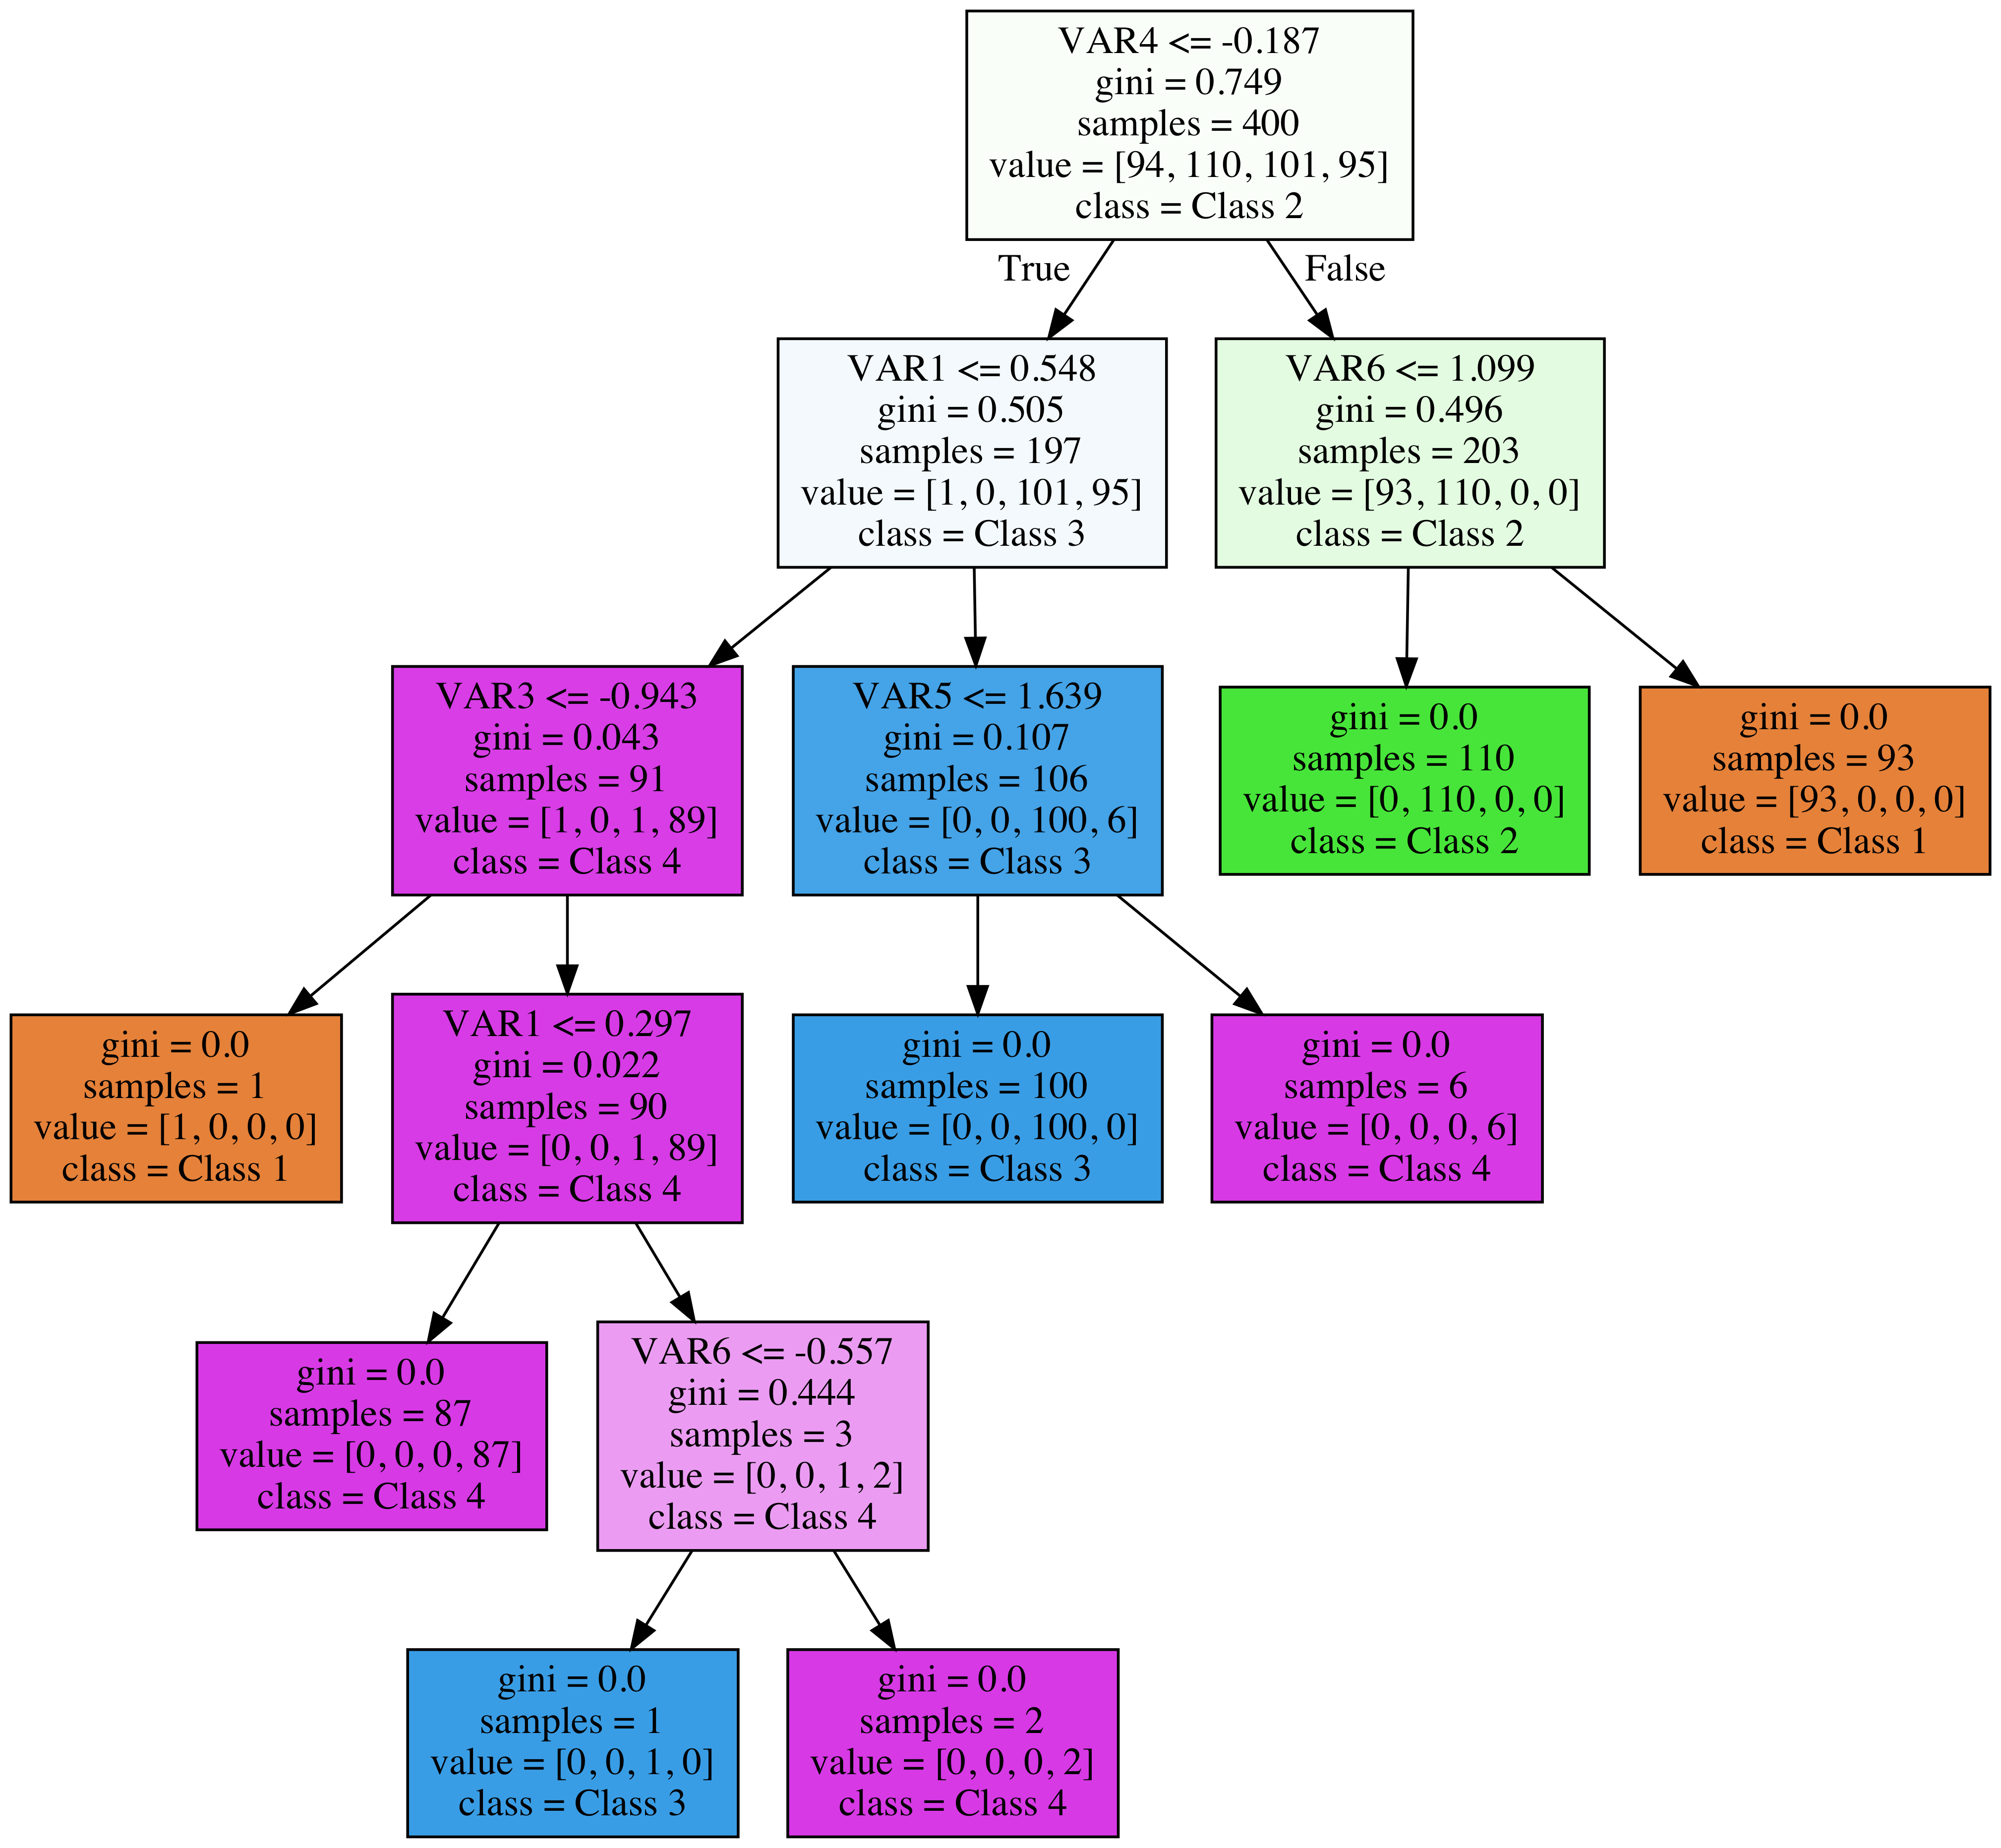

In [23]:
#Decision tree contains 9 Nodes
#3 different colors, hence max_depth
from IPython.display import Image
Image('tree.png')

The following is a Ensemble Classifier: RANDOM FOREST

In [27]:
params_rf = { 'n_estimators': [1,2,3,4,5,6,7,8,9,10] }
             
grid_rf = GridSearchCV(estimator=model, 
                       param_grid=params_rf, 
                       cv=3)

#grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_

print('Best paramater to optomize:\n', best_hyperparams)

Best hyerparameters:
 {'n_estimators': 10}


In [30]:
model = RandomForestClassifier(n_estimators=10, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

model.fit(X_train, y_train)

n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 22
Average maximum depth 6


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [32]:
clf = RandomForestClassifier(n_estimators=10) #n_estimators, num of decison trees , this can be changed  parameter for optimization

clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Predicted accuracy: %.3f%%' % (100*accuracy(conf_te),))

predicted_labels = clf.predict(X_test)

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell),
    for label in labels:
        print ("%{0}s".format(columnwidth) % label),
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1),
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell),
        print

conf = confusion_matrix(y_test, predicted_labels)
# then print it in a pretty way
#print_cm(conf, patterns_labels)

print('Classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confusion matrix:\n',confusion_matrix(y_test, predicted_labels))

Predicted accuracy: 100.000%
Classification accuracy = 1.000000
Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        31
     Class_2       1.00      1.00      1.00        15
     Class_3       1.00      1.00      1.00        24
     Class_4       1.00      1.00      1.00        30

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


 confussion matrix:
 [[31  0  0  0]
 [ 0 15  0  0]
 [ 0  0 24  0]
 [ 0  0  0 30]]


During the first implementation of Decision tress default parameters are used for the decision tree. Therefore, the tree can grow as deep as necessary completely separate the classes. Using default parameters leads to overfitting because the model memorizes the dataset. 
Tuning the parameters helps, such as limiting the depth of the tree so it can generalize to testing data.

Using a Grid Search object helped us in choosing the best set of optimization parameters for our Decision Tree Classifier.

Max_Depth indicates how deep the decision tree is allowed to be which is proportionally correlated to the number of splits. Hence, it will capture more information about the data. This parameter can lead to overfitting large depth values. 

At first, we have a large tree that performs well on training data but will not perform as efficiently on testing data. Therefore, by specifying max_depth we can shorten the tree, which will perform better on the testing data. 

Random forest is considered an ensemble classifier. This Random Forest model consists of many decision trees. 

When making predictions, the Random Forest averages the predictions of a single decision tree for each data point. Then it combines the single Decision Trees. Once implememting the random forest using sckikit-learn, we see that each decicsion tree in the forest has many nodes and is extrmeely deep. The average number of nodes increased to 22 and average maximum depth is now 6. 
Using a Grid Search object helped us in choosing the best set of optimization parameters for our Decision Tree Classifier. In the end, Paramter Optimization enabled for a 100% prediction accuracy.
